# Minimizing the Objective function

In [32]:
import numpy as np
import joblib
from deap import base, creator, tools, algorithms
import warnings
warnings.filterwarnings("ignore")

model=joblib.load(r'..\Modeling\Models\random_forest_model_gridsearch_optimized.pkl')

# Define the weights for the objective function
weights = [-2.0, -2.0, -2.0, 2.0, -1.0]

def fitness(individual):
    # Convert the individual to a 2D array
    X = np.array(individual).reshape(1, -1)

    predictions = model.predict(X)[0]

    objectives=[]
    for i in range(len(predictions)):
        if i<=2:
            p=predictions[i]
            penalty = 0
            if p < 20 or p > 40:
                # Distance to the center of the target range
                penalty = abs(p - 30)**2
        else:
            penalty=0
        objectives.append( weights[i] * p + penalty)

    # Return a tuple of fitness values
    return tuple(objectives)

In [33]:
toolbox = base.Toolbox()

def attr_generator():
    return [np.random.uniform(1.0, 1800.0), 
            np.random.uniform(1.0, 4.0), 
            np.random.uniform(22.5, 90.0), 
            np.random.uniform(60.0, 120.0), 
            np.random.uniform(0.0, 67.0), 
            np.random.uniform(0.01, 1.0), 
            np.random.uniform(1.0, 80.0), 
            np.random.uniform(120.0, 336.0), 
            np.random.uniform(2.0, 4.0), 
            np.random.uniform(1.0, 80.0), 
            np.random.uniform(120.0, 336.0)]

creator.create("FitnessMulti", base.Fitness, weights=tuple(weights)) 
creator.create("Individual", list, fitness=creator.FitnessMulti)

toolbox = base.Toolbox()

# Attribute generator 
toolbox.register("attr_float", attr_generator)
toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.attr_float)

# Structure initializers
toolbox.register("population", tools.initRepeat, list, toolbox.individual)

# Define the genetic operators
toolbox.register("evaluate", fitness)
toolbox.register("mate", tools.cxTwoPoint)
toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=0.2, indpb=0.2)
toolbox.register("select", tools.selNSGA2)

# initial population
pop = toolbox.population(n=100)

# genetic algorithm
result = algorithms.eaSimple(pop, toolbox, cxpb=0.6, mutpb=0.5, ngen=100, verbose=True)

gen	nevals
0  	100   
1  	78    
2  	76    
3  	82    
4  	74    
5  	79    
6  	87    
7  	85    
8  	82    
9  	73    
10 	81    
11 	79    
12 	80    
13 	82    
14 	86    
15 	82    
16 	76    
17 	83    
18 	87    
19 	82    
20 	79    
21 	81    
22 	89    
23 	86    
24 	78    
25 	77    
26 	77    
27 	84    
28 	78    
29 	69    
30 	83    
31 	78    
32 	72    
33 	78    
34 	80    
35 	67    
36 	82    
37 	75    
38 	81    
39 	81    
40 	76    
41 	73    
42 	85    
43 	86    
44 	84    
45 	81    
46 	86    
47 	80    
48 	86    
49 	80    
50 	81    
51 	78    
52 	82    
53 	76    
54 	78    
55 	84    
56 	75    
57 	74    
58 	72    
59 	81    
60 	78    
61 	78    
62 	80    
63 	78    
64 	80    
65 	80    
66 	77    
67 	79    
68 	84    
69 	84    
70 	78    
71 	74    
72 	82    
73 	85    
74 	90    
75 	76    
76 	76    
77 	80    
78 	80    
79 	84    
80 	74    
81 	85    
82 	72    
83 	85    
84 	86    
85 	77    
86 	83    
87 	74    
88 	77    
89 	72    

In [35]:
# individual with the best fitness
best_ind = tools.selBest(pop, 1)[0]

# best individual as input
best_output = model.predict(np.array(best_ind).reshape(1, -1))[0]

# objective function
objective_str = f"Objective Function = {weights[0]} * ({best_output[0]}) + {weights[1]} * ({best_output[1]}) + {weights[2]} * ({best_output[2]}) + {weights[3]} * ({best_output[3]}) + {weights[4]} * ({best_output[4]})"

print(objective_str)


Objective Function = -2.0 * (35.03155416632619) + -2.0 * (23.824362397260007) + -2.0 * (26.311525745595997) + 2.0 * (57.60378500000006) + -1.0 * (258.5)


In [37]:
best_individual = tools.selBest(pop, 1)[0]
print('Best individual: ', best_individual)
print('Best fitness: ', best_individual.fitness.values[0])

for index,i in enumerate(['cycle_number', 'heat_rate_1_c_min', 'ramp_1_duration_min',
       'temperature_dwell_1_min', 'ramp_2_duration_min',
       'vacuum_pressure_patm_pa', 'vacuum_start_time_min',
       'vacuum_duration_min', 'autoclave_pressure_patm_pa',
       'autoclave_start_time_min', 'autoclave_duration_min']):
           print(f'Variable: {i}, value: {best_individual[index]}')

Best individual:  [1010.9085849573894, 3.8642170144976955, 80.44615523776234, 101.62920877410372, 40.45685482558758, 0.03641110585339763, 28.783159994384754, 193.33048129580138, 3.2203644240520335, 60.330360772295634, 335.5881949459123]
Best fitness:  -70.06310833265238
Variable: cycle_number, value: 1010.9085849573894
Variable: heat_rate_1_c_min, value: 3.8642170144976955
Variable: ramp_1_duration_min, value: 80.44615523776234
Variable: temperature_dwell_1_min, value: 101.62920877410372
Variable: ramp_2_duration_min, value: 40.45685482558758
Variable: vacuum_pressure_patm_pa, value: 0.03641110585339763
Variable: vacuum_start_time_min, value: 28.783159994384754
Variable: vacuum_duration_min, value: 193.33048129580138
Variable: autoclave_pressure_patm_pa, value: 3.2203644240520335
Variable: autoclave_start_time_min, value: 60.330360772295634
Variable: autoclave_duration_min, value: 335.5881949459123


In [7]:
# best individual
best_individual = tools.selBest(pop, 1)[0]

X = np.array(best_individual).reshape(1, -1)
predictions = model.predict(X)

# objective function for each individual
objectives = [sum(w * p for w, p in zip(weights, model.predict(np.array(individual).reshape(1, -1)).flatten())) for individual in pop]

# range and mean of the objective function
objective_range = max(objectives) - min(objectives)
objective_mean = sum(objectives) / len(objectives)

print('Range of objective function: ', objective_range)
print('Mean of objective function: ', objective_mean)



Range of objective function:  370.6565632886794
Mean of objective function:  -608.3871067812138


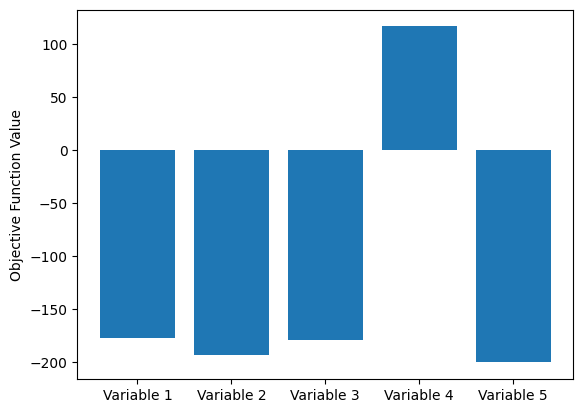

In [8]:
import matplotlib.pyplot as plt
predictions = model.predict(X).flatten()
objectives = [w * p.item() for w, p in zip(weights, predictions)]

# Create a bar plot
plt.bar(range(len(objectives)), objectives)

# Label the x-axis with the names of the output variables
plt.xticks(range(len(objectives)), ['Variable 1', 'Variable 2', 'Variable 3', 'Variable 4', 'Variable 5'])  # Replace with your actual variable names

# Label the y-axis
plt.ylabel('Objective Function Value')

# Show the plot
plt.show()


In [10]:
# each variable for each individual
variables = [[p for p in model.predict(np.array(individual).reshape(1, -1)).flatten()] for individual in pop]

# Transpose the list of variables so that each row corresponds to a variable and each column corresponds to an individual
variables = list(map(list, zip(*variables)))
output_var_names=['ad_porosity_percent', 'pr_porosity_percent', 'eff_porosity_percent',
       'max_fiber_volume_fraction_percent', 'cure_cycle_total_time_min']

# the range for each variable
ranges = [max(variable) - min(variable) for variable in variables]
maximum= [max(variable) for variable in variables]
minimum= [min(variable) for variable in variables]

for i, range_ in enumerate(ranges):
    print('Range of raw variable {}: {}'.format(output_var_names[i], range_))

for i, max_ in enumerate(maximum):
    print('Max of raw variable {}: {}'.format(output_var_names[i], max_))

for i, min_ in enumerate(minimum):
    print('Min of raw variable {}: {}'.format(output_var_names[i], min_))



Range of raw variable ad_porosity_percent: 87.23106004671997
Range of raw variable pr_porosity_percent: 73.10392709339999
Range of raw variable eff_porosity_percent: 72.85797809710002
Range of raw variable max_fiber_volume_fraction_percent: 0.8806380000000686
Range of raw variable cure_cycle_total_time_min: 34.25
Max of raw variable ad_porosity_percent: 88.63171412859997
Max of raw variable pr_porosity_percent: 96.41972115449998
Max of raw variable eff_porosity_percent: 89.42268424320004
Max of raw variable max_fiber_volume_fraction_percent: 58.52703800000001
Max of raw variable cure_cycle_total_time_min: 234.25
Min of raw variable ad_porosity_percent: 1.4006540818799984
Min of raw variable pr_porosity_percent: 23.315794061099986
Min of raw variable eff_porosity_percent: 16.564706146100015
Min of raw variable max_fiber_volume_fraction_percent: 57.64639999999994
Min of raw variable cure_cycle_total_time_min: 200.0


In [11]:
# Calculate each variable in the objective function for each individual
variables = [[w * p for w, p in zip(weights, model.predict(np.array(individual).reshape(1, -1)).flatten())] for individual in pop]

# Transpose the list of variables so that each row corresponds to a variable and each column corresponds to an individual
variables = list(map(list, zip(*variables)))


# Calculate the range for each variable in the objective function
ranges = [max(variable) - min(variable) for variable in variables]
maximum= [max(variable) for variable in variables]
minimum= [min(variable) for variable in variables]

output_var_names=['ad_porosity_percent', 'pr_porosity_percent', 'eff_porosity_percent',
       'max_fiber_volume_fraction_percent', 'cure_cycle_total_time_min']
# Print the ranges
for i, range_ in enumerate(ranges):
    print('Range of weighted variable {}: {}'.format(output_var_names[i], range_))

for i, max_ in enumerate(maximum):
    print('Max of weighted variable {}: {}'.format(output_var_names[i], max_))

for i, min_ in enumerate(minimum):
    print('Min of weighted variable {}: {}'.format(output_var_names[i], min_))

Range of weighted variable ad_porosity_percent: 174.46212009343995
Range of weighted variable pr_porosity_percent: 146.20785418679998
Range of weighted variable eff_porosity_percent: 145.71595619420003
Range of weighted variable max_fiber_volume_fraction_percent: 1.7612760000001373
Range of weighted variable cure_cycle_total_time_min: 34.25
Max of weighted variable ad_porosity_percent: -2.801308163759997
Max of weighted variable pr_porosity_percent: -46.63158812219997
Max of weighted variable eff_porosity_percent: -33.12941229220003
Max of weighted variable max_fiber_volume_fraction_percent: 117.05407600000002
Max of weighted variable cure_cycle_total_time_min: -200.0
Min of weighted variable ad_porosity_percent: -177.26342825719993
Min of weighted variable pr_porosity_percent: -192.83944230899996
Min of weighted variable eff_porosity_percent: -178.84536848640008
Min of weighted variable max_fiber_volume_fraction_percent: 115.29279999999989
Min of weighted variable cure_cycle_total_tim

In [12]:
print(weights)

[-2.0, -2.0, -2.0, 2.0, -1.0]


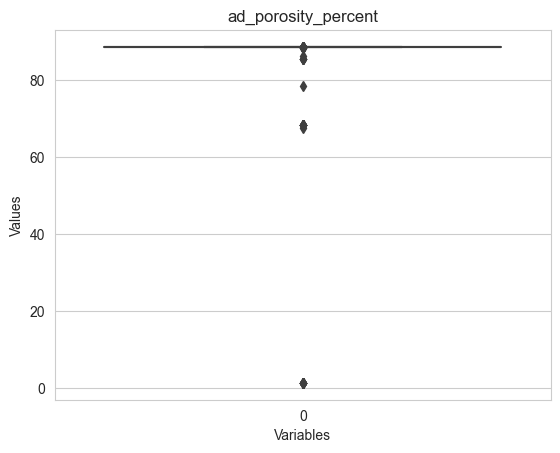

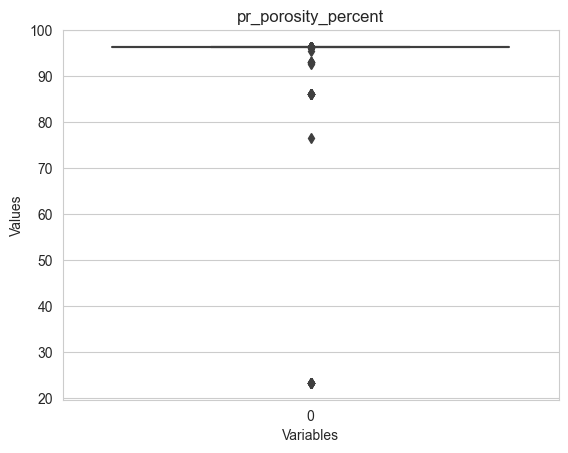

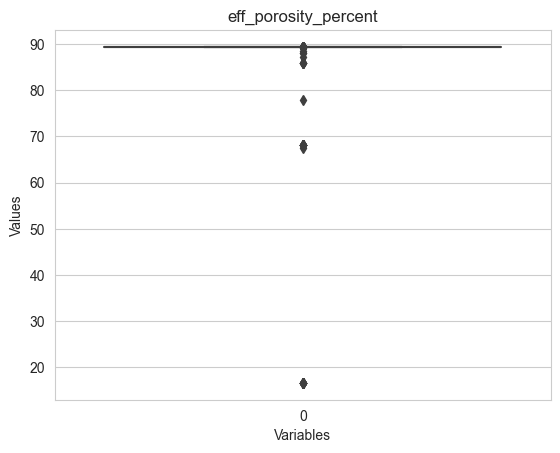

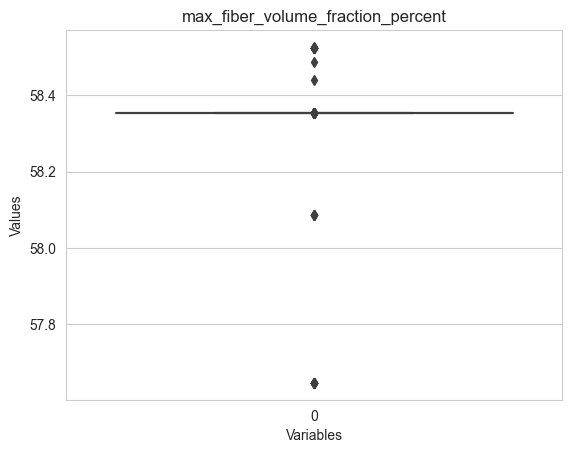

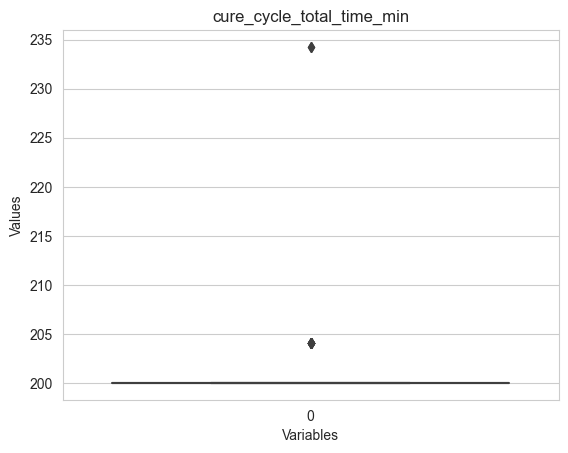

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
# Calculate each variable for each individual
variables = [[p for p in model.predict(np.array(individual).reshape(1, -1)).flatten()] for individual in pop]
# Transpose the variables list
variables = list(map(list, zip(*variables)))

# Create boxplots for each variable
for i, var_list in enumerate(variables):
    # Create a figure and axes for the boxplot
    fig, ax = plt.subplots()
    
    # Create the boxplot using seaborn
    sns.boxplot(data=var_list, ax=ax)
    
    # Set the title and axis labels
    ax.set_title(output_var_names[i])
    ax.set_xlabel('Variables')
    ax.set_ylabel('Values')
    
    # Show the boxplot
    plt.show()


# Understanding the range of objective function with varying weights

Currently optimizing on CXPB: 0.2 & MUTPB: 0.1
Currently optimizing on CXPB: 0.3 & MUTPB: 0.2
Currently optimizing on CXPB: 0.4 & MUTPB: 0.3
Currently optimizing on CXPB: 0.5 & MUTPB: 0.4
Currently optimizing on CXPB: 0.6 & MUTPB: 0.5


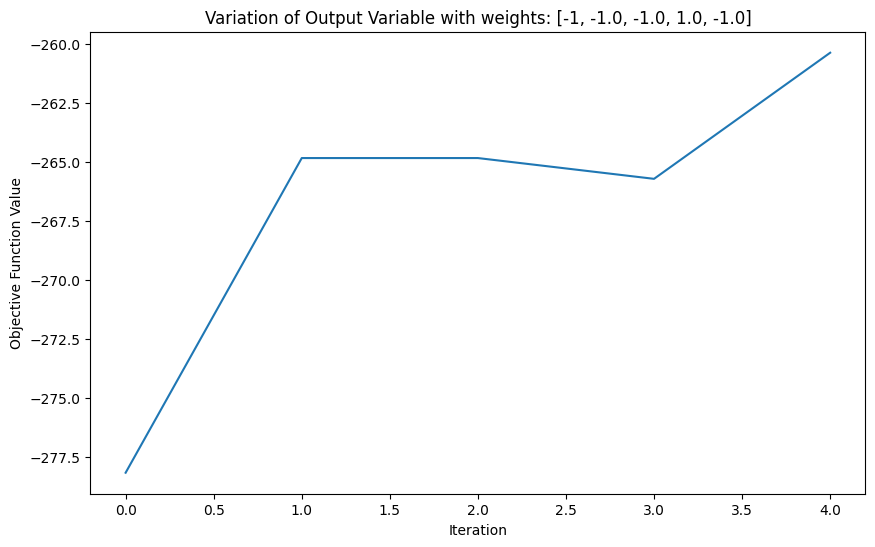

Currently optimizing on CXPB: 0.2 & MUTPB: 0.1
Currently optimizing on CXPB: 0.3 & MUTPB: 0.2
Currently optimizing on CXPB: 0.4 & MUTPB: 0.3
Currently optimizing on CXPB: 0.5 & MUTPB: 0.4
Currently optimizing on CXPB: 0.6 & MUTPB: 0.5


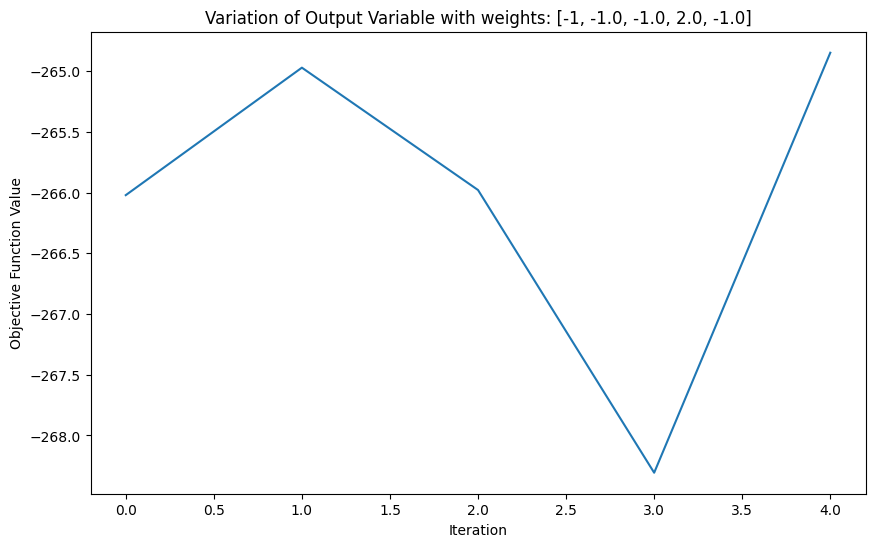

Currently optimizing on CXPB: 0.2 & MUTPB: 0.1
Currently optimizing on CXPB: 0.3 & MUTPB: 0.2
Currently optimizing on CXPB: 0.4 & MUTPB: 0.3
Currently optimizing on CXPB: 0.5 & MUTPB: 0.4
Currently optimizing on CXPB: 0.6 & MUTPB: 0.5


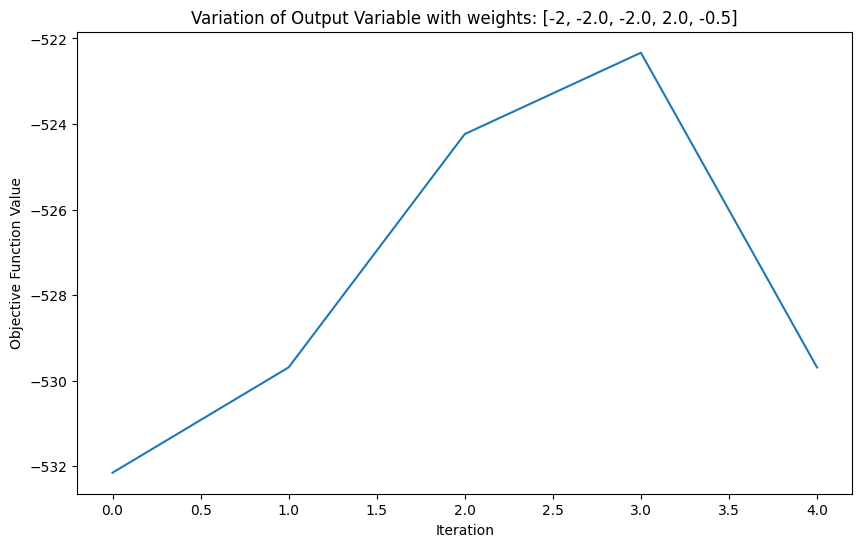

Currently optimizing on CXPB: 0.2 & MUTPB: 0.1
Currently optimizing on CXPB: 0.3 & MUTPB: 0.2
Currently optimizing on CXPB: 0.4 & MUTPB: 0.3
Currently optimizing on CXPB: 0.5 & MUTPB: 0.4
Currently optimizing on CXPB: 0.6 & MUTPB: 0.5


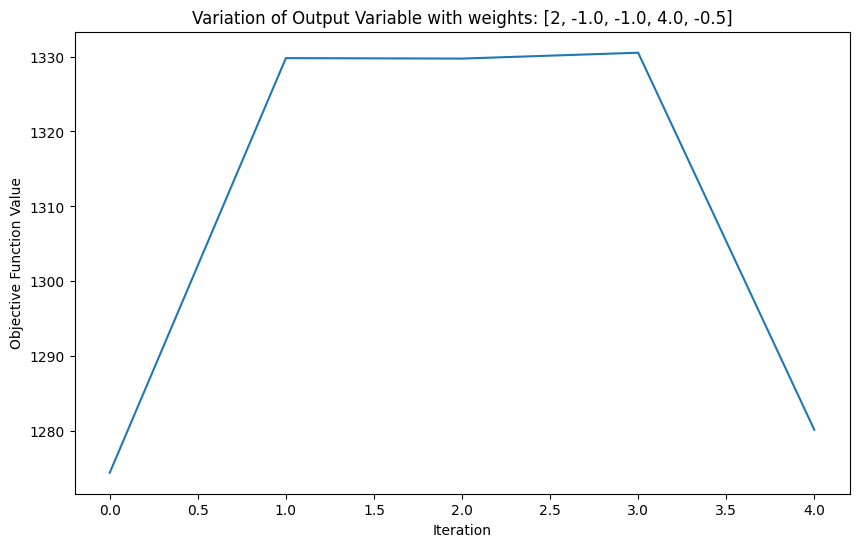

Currently optimizing on CXPB: 0.2 & MUTPB: 0.1
Currently optimizing on CXPB: 0.3 & MUTPB: 0.2
Currently optimizing on CXPB: 0.4 & MUTPB: 0.3
Currently optimizing on CXPB: 0.5 & MUTPB: 0.4
Currently optimizing on CXPB: 0.6 & MUTPB: 0.5


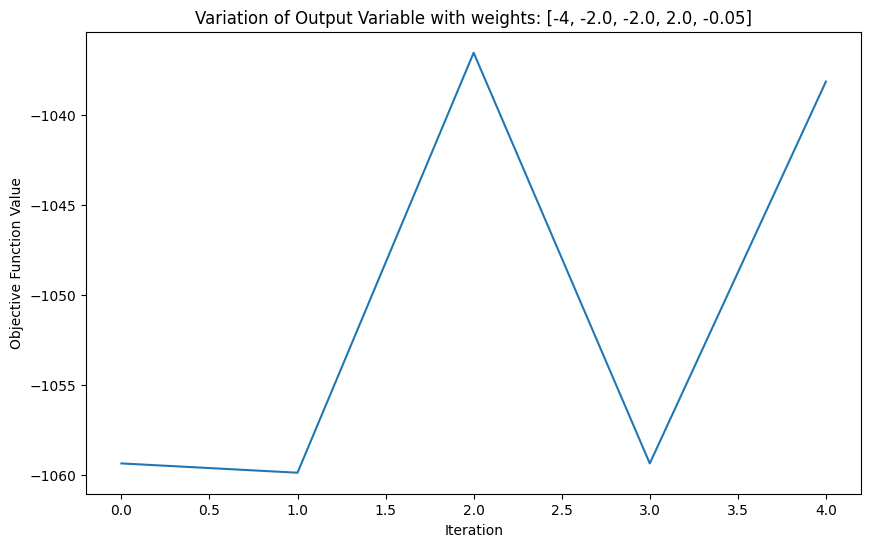

Currently optimizing on CXPB: 0.2 & MUTPB: 0.1
Currently optimizing on CXPB: 0.3 & MUTPB: 0.2
Currently optimizing on CXPB: 0.4 & MUTPB: 0.3
Currently optimizing on CXPB: 0.5 & MUTPB: 0.4
Currently optimizing on CXPB: 0.6 & MUTPB: 0.5


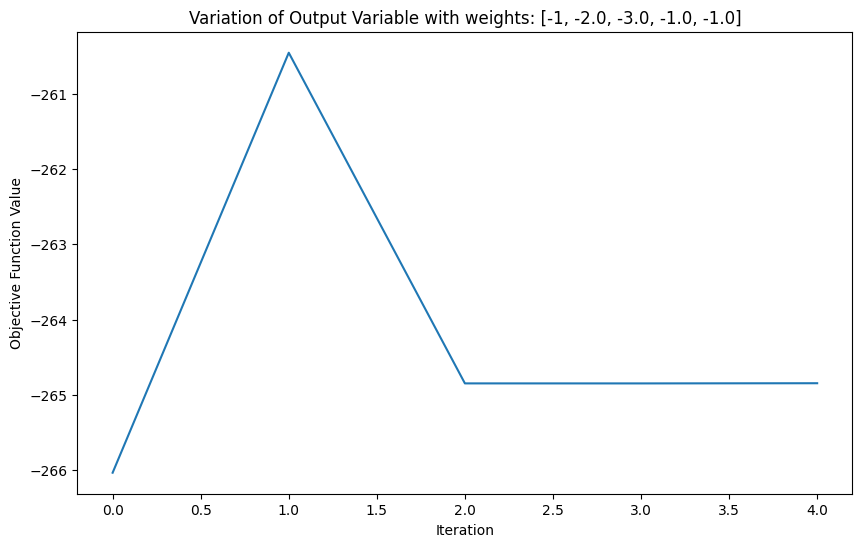

In [30]:
model=joblib.load(r'..\Modeling\Models\random_forest_model_gridsearch_optimized.pkl')

# Define the weights for the objective function
weights_list = [[-1, -1.0, -1.0, 1.0, -1.0],
                [-1, -1.0, -1.0, 2.0, -1.0],
                [-2, -2.0, -2.0, 2.0, -0.5],
                [2, -1.0, -1.0, 4.0, -0.5],
                [-4, -2.0, -2.0, 2.0, -0.05],
                [-1, -2.0, -3.0, -1.0, -1.0]]

cxpb_list = [0.2, 0.3, 0.4, 0.5, 0.6]
mutpb_list = [0.1, 0.2, 0.3, 0.4, 0.5]


# Attribute generator 
def attr_generator():
    return [np.random.uniform(1.0, 1800.0), 
            np.random.uniform(1.0, 4.0), 
            np.random.uniform(22.5, 90.0), 
            np.random.uniform(60.0, 120.0), 
            np.random.uniform(0.0, 67.0), 
            np.random.uniform(0.01, 1.0), 
            np.random.uniform(1.0, 80.0), 
            np.random.uniform(120.0, 336.0), 
            np.random.uniform(2.0, 4.0), 
            np.random.uniform(1.0, 80.0), 
            np.random.uniform(120.0, 336.0)]




def fitness(individual, weights):
    X = np.array(individual).reshape(1, -1)
    predictions = model.predict(X)
    objective = sum(w * p for w, p in zip(weights, predictions))
    return sum(objective),

for weights in weights_list:
    creator.create("FitnessMax", base.Fitness, weights=(1.0,))
    creator.create("Individual", list, fitness=creator.FitnessMax)

    toolbox = base.Toolbox()
    toolbox.register("attr_float", attr_generator)
    toolbox.register("individual", tools.initIterate, creator.Individual, toolbox.attr_float)
    toolbox.register("population", tools.initRepeat, list, toolbox.individual)
    
    # Use functools.partial to freeze the extra argument
    toolbox.register("evaluate", partial(fitness, weights=weights))
    
    toolbox.register("mate", tools.cxTwoPoint)
    toolbox.register("mutate", tools.mutGaussian, mu=0, sigma=1, indpb=0.1)
    toolbox.register("select", tools.selTournament, tournsize=3)

    objective_values = []
    for cxpb, mutpb in zip(cxpb_list, mutpb_list):
        print(f'Currently optimizing on CXPB: {cxpb} & MUTPB: {mutpb}')
        pop = toolbox.population(n=100)
        result, log = algorithms.eaSimple(pop, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=100, verbose=False)
        best_individual = tools.selBest(result, k=1)[0]
        objective_values.append(fitness(best_individual, weights))
        
    plt.figure(figsize=(10, 6))
    plt.plot(objective_values)
    plt.title('Variation of Output Variable with weights: {}'.format(weights))
    plt.xlabel('Iteration')
    plt.ylabel('Objective Function Value')
    plt.show()
